In [1]:
import pandas as pd
from sklearn.preprocessing import normalize
import scipy.cluster.hierarchy as shc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import AgglomerativeClustering

In [2]:
df_health =pd.read_csv("https://raw.githubusercontent.com/firdthebird/Capstone/master/RegionalInterestByConditionOverTime.csv")
df_health = df_health[(df_health["dma"]=="Austin TX") \
|  (df_health["dma"]=="Seattle-Tacoma WA")\
| (df_health["dma"]=="Chicago IL")]
df_health

,dma,geoCode,2004+cancer,2004+cardiovascular,2004+stroke,2004+depression,2004+rehab,2004+vaccine,2004+diarrhea,2004+obesity,...,2016+diabetes,2017+cancer,2017+cardiovascular,2017+stroke,2017+depression,2017+rehab,2017+vaccine,2017+diarrhea,2017+obesity,2017+diabetes
85,Chicago IL,602,44,6,15,41,20,31,14,26,...,73,65,32,58,59,45,69,66,49,71
111,Austin TX,635,37,5,13,38,18,31,17,22,...,73,57,30,54,54,51,76,63,43,73
199,Seattle-Tacoma WA,819,42,4,15,39,15,32,13,26,...,72,57,22,63,56,42,80,63,46,71


In [3]:
df_health.drop(["dma", "geoCode"], axis = 1, inplace = True)
df_health

,2004+cancer,2004+cardiovascular,2004+stroke,2004+depression,2004+rehab,2004+vaccine,2004+diarrhea,2004+obesity,2004+diabetes,2005+cancer,...,2016+diabetes,2017+cancer,2017+cardiovascular,2017+stroke,2017+depression,2017+rehab,2017+vaccine,2017+diarrhea,2017+obesity,2017+diabetes
85,44,6,15,41,20,31,14,26,35,64,...,73,65,32,58,59,45,69,66,49,71
111,37,5,13,38,18,31,17,22,33,53,...,73,57,30,54,54,51,76,63,43,73
199,42,4,15,39,15,32,13,26,33,60,...,72,57,22,63,56,42,80,63,46,71


In [4]:
data_scaled = normalize(df_health)
data_scaled = pd.DataFrame(data_scaled, columns=df_health.columns)
data_scaled.head()

,2004+cancer,2004+cardiovascular,2004+stroke,2004+depression,2004+rehab,2004+vaccine,2004+diarrhea,2004+obesity,2004+diabetes,2005+cancer,...,2016+diabetes,2017+cancer,2017+cardiovascular,2017+stroke,2017+depression,2017+rehab,2017+vaccine,2017+diarrhea,2017+obesity,2017+diabetes
0,0.083277,0.011356,0.028390,0.077599,0.037853,0.058673,0.026497,0.049209,0.066243,0.121131,...,0.138165,0.123023,0.060565,0.109775,0.111667,0.085170,0.130594,0.124916,0.092741,0.134379
1,0.070587,0.009539,0.024801,0.072495,0.034340,0.059140,0.032432,0.041971,0.062956,0.101111,...,0.139266,0.108742,0.057233,0.103019,0.103019,0.097295,0.144989,0.120189,0.082033,0.139266
2,0.081779,0.007788,0.029207,0.075937,0.029207,0.062308,0.025312,0.050625,0.064255,0.116827,...,0.140192,0.110986,0.042837,0.122668,0.109038,0.081779,0.155769,0.122668,0.089567,0.138245


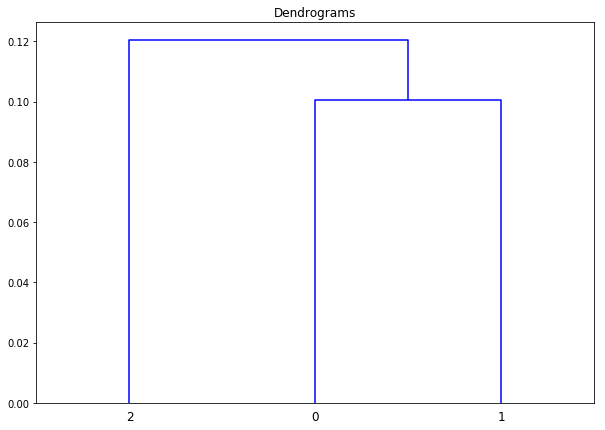

In [5]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

In [10]:
cluster = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(data_scaled)

array([0, 0, 1])

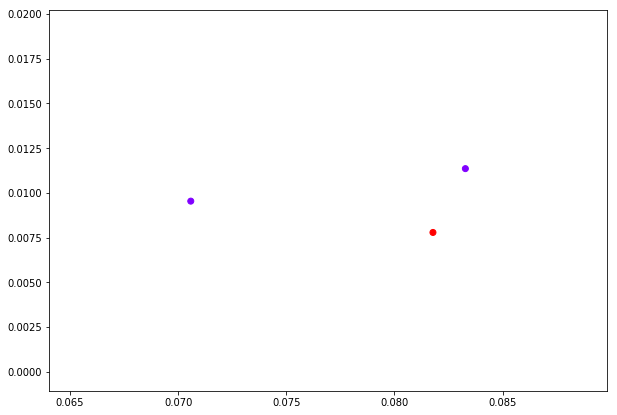

In [11]:
plt.figure(figsize=(10, 7))
df =data_scaled.to_numpy()
plt.scatter(df[:,0], df[:,1], c=cluster.labels_, cmap='rainbow')